# Making validation data

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
image_val = []
for i in range(561,682):
    img = mpimg.imread('C:/Users/tapan/OneDrive/Desktop/ML/Train/'+str(i)+'.jpeg')
    image_val.append(img)

 
# Output Images
#plt.imshow(img)

In [2]:
import numpy as np
import pandas as pd

In [3]:
X_val = np.array(image_val)


In [4]:
X_val.shape

(121, 224, 224, 3)

# Making Testing data

In [5]:
 
# Read Images
image_test = []
for i in range(682,801,1):
    img = mpimg.imread('C:/Users/tapan/OneDrive/Desktop/ML/Train/'+str(i)+'.jpeg')
    image_test.append(img)

 
# Output Images
#plt.imshow(img)

In [6]:
X_test = np.array(image_test)


In [7]:
X_test.shape

(119, 224, 224, 3)

# Making Training data

In [8]:
# Read Images
image_train = []
for i in range(561):
    img = mpimg.imread('C:/Users/tapan/OneDrive/Desktop/ML/Train/'+str(i)+'.jpeg')
    image_train.append(img)

 
# Output Images
#plt.imshow(img)

In [9]:
X_train = np.array(image_train)
X_train.shape

(561, 224, 224, 3)

# labels set

In [10]:
df = pd.read_excel('Downloads/UPDATED_1_training_label.xlsx')

In [11]:
df.drop(['image','Unnamed: 4','class','Unnamed: 2','Unnamed: 3','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)

In [12]:
df.head()

,dent,head_lamp,scratch,glass_shatter,tail_lamp,unknown
0,1,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1


In [13]:
y_train = df[:561]

In [14]:
len(y_train)

561

In [15]:
y_test = df[682:801]
len(y_test)

119

In [16]:
y_val = df[561:682]
len(y_val)

121

In [17]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [18]:
y_test.shape

(119, 6)

In [19]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

# Bulding Model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [23]:
np.random.seed(23)
model = Sequential([layers.Conv2D(25,(3,3), padding='same',strides=(1,1),kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', kernel_initializer='he_uniform', input_shape=[224,224,3]),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(center=True, scale=True),
layers.Dropout(0.5),
#layers.Conv2D(50, (3,3), padding='same',strides = (1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(0.01), kernel_initializer='he_uniform'),
#layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(70, (3,3), padding='same',strides = (1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(0.01), kernel_initializer='he_uniform'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.BatchNormalization(center=True, scale=True),
layers.Dropout(0.5),
layers.Flatten(),
layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),
layers.Dense(256, activation='relu', kernel_initializer='he_uniform'),

layers.Dense(6, activation='sigmoid')])


In [84]:
# Compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model
history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
            batch_size=32,
            epochs=10,
            verbose=1,
            )

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 224, 224, 25)      700       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 112, 112, 25)     0         
 g2D)                                                            
                                                                 
 batch_normalization_29 (Bat  (None, 112, 112, 25)     100       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 112, 112, 25)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 70)      15820     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 56, 56, 70)     

<AxesSubplot:>

<Figure size 720x1080 with 0 Axes>

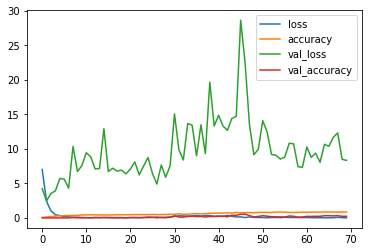

In [88]:

looses = model.history.history
loos = pd.DataFrame(looses)
loos.plot()

# Hyperparmeter Tunning

In [2]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [1]:
conda install scikeras[tensorflow]

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - scikeras

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
def create_model(init_mode='uniform'):
    # define model
    model = Sequential([layers.Conv2D(64,7, strides=2, activation='relu', kernel_initializer='he_uniform', input_shape=[224,224,3]),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(center=True, scale=True),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(center=True, scale=True),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(6, activation='sigmoid')])
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
    return model

In [ ]:
np.random.seed(20)
init_mode = ['glorot_uniform', 'uniform'] 
batches = [16,32,64]
epochs = [10, 20,30,40,50]
model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters

param_grid = dict(epochs=epochs, batch_size=batches, init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)